In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import datetime
import nltk
from nltk import pos_tag

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# import data

file = pd.read_csv("C:\\Users\\sonja tilly.ABERDEEN\\abcnews-date-text.csv")

In [3]:
data = file[750000:]

In [4]:
data.head()

,publish_date,headline_text
750000,20121218,syrian rebels take over palestinian camp
750001,20121218,syrias prime minister sneaks into war torn aleppo
750002,20121218,target 100s virtual farm in sydneys cbd
750003,20121218,taxi driver in court over fatal passenger death
750004,20121218,teenager killed in road smash


In [5]:
# calculate polarity scores

sentences=[i for i in data.headline_text]
sid = SIA()

scores = []
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 
    scores.append(ss['compound'])

In [6]:
data['polarity_scores'] = scores

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
data.head()

,publish_date,headline_text,polarity_scores
750000,20121218,syrian rebels take over palestinian camp,-0.2023
750001,20121218,syrias prime minister sneaks into war torn aleppo,-0.7096
750002,20121218,target 100s virtual farm in sydneys cbd,0.0000
750003,20121218,taxi driver in court over fatal passenger death,-0.8126
750004,20121218,teenager killed in road smash,-0.6705


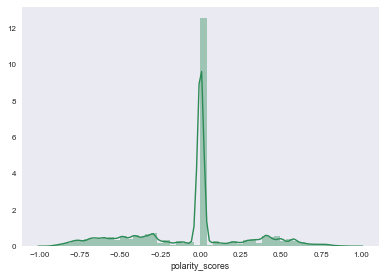

In [8]:
sns.set_style("dark")
sns.set_context("paper") #use talk for larger chart
sns.set_color_codes()

sns.distplot(data['polarity_scores'], color='seagreen')

**Preprocessing**

In [9]:
# load nltk's English stopwords as 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
more_stopwords = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
stopwords.extend(more_stopwords)
print(stopwords[0:10])

# create tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

# load nltk's Lemmatizer

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer() 

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're"]


In [10]:
# create function to create list of sentences

def raw_text(lol):
    temp = []
    for i in lol:
        sent = " ".join(str(item) for item in i)
        temp.append(sent)
    return temp

In [11]:
# tidy up text

def clean_up(temp0):
    temp1 = [t.lower() for t in temp0]
    temp2 = [(tokenizer.tokenize(t)) for t in temp1]
    temp3 = [[(wordnet_lemmatizer.lemmatize(t)) for t in l] for l in temp2]
    temp4 = raw_text(temp3)
    temp5 = [[i for i in l.split() if i not in stopwords] for l in temp4]
    return temp5

In [12]:
text = [line for line in data.headline_text]
text[0:2]

['syrian rebels take over palestinian camp',
 'syrias prime minister sneaks into war torn aleppo']

In [13]:
tokens = clean_up(text)

In [14]:
tokens[0:10]

[['syrian', 'rebel', 'take', 'palestinian', 'camp'],
 ['syria', 'prime', 'minister', 'sneak', 'war', 'torn', 'aleppo'],
 ['target', '100', 'virtual', 'farm', 'sydney', 'cbd'],
 ['taxi', 'driver', 'court', 'fatal', 'passenger', 'death'],
 ['teenager', 'killed', 'road', 'smash'],
 ['tennant', 'creek', 'police', 'flood', 'warning'],
 ['australian', 'sharemarket', 'bounce', 'back'],
 ['drum', 'tuesday', '18', 'december'],
 ['indigenous', 'quarter'],
 ['thousand', 'farewell', 'nurse', 'died', 'prank', 'call']]

**Latent Dirichlet Allocation for topic modelling**

In [15]:
from gensim import corpora, models 

#def lda_model(words):
def lda_model(text):
    dictionary = corpora.Dictionary(text)
    corpus_lda = [dictionary.doc2bow(t) for t in text] 
    lda = models.LdaModel(corpus_lda, num_topics=7,  
                                    id2word=dictionary) 
    topics_matrix = lda.show_topics(formatted=True, num_words=7)
    raw = raw_text(topics_matrix)
    stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', 
             '9', '0', '*', '.', '"', ',']
    chars = [''.join([char for char in l if char not in stuff]) for l in raw]
    topics = pd.DataFrame(chars, columns = ['Words'])
    for w in topics.Words:
        print w
    return topics


C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim-3.2.0-py2.7-win-amd64.egg\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
lda_model(tokens)

 new  wa  ash  show  home  say  royal
 adelaide  crash  woman  car  dy  world  cup
 trump  australia  queensland  day  sex  north  test
 say  wa  family  state  government  health  tasmanian
 turnbull  power  change  say  final  big  open
 police  man  death  donald  year  murder  attack
 election  australian  labor  market  tasmania  national  christmas


,Words
0,new wa ash show home say royal
1,adelaide crash woman car dy world cup
2,trump australia queensland day sex north...
3,say wa family state government health t...
4,turnbull power change say final big open
5,police man death donald year murder attack
6,election australian labor market tasmania...


**Classification task: predict positive/negative headlines**

In [17]:
clean_text = raw_text(tokens)

In [23]:
reduced_text = clean_text[0:50000]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(reduced_text)

count_vectorizer = CountVectorizer()
count_v = count_vectorizer.fit_transform(reduced_text)

In [25]:
# transform polarity scores to target

def transform_target(score):
    if score > 0:
        return 2
    elif score == 0:
        return 1
    else:
        return 0

target = data['polarity_scores']
y = target.apply(transform_target)[:50000]

In [26]:
X = tfidf

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                                 activation='relu', 
                                 solver='adam', 
                                 alpha=0.0001, 
                                 batch_size='auto', 
                                 learning_rate='constant', 
                                 learning_rate_init=0.001, 
                                 power_t=0.5, 
                                 max_iter=200, 
                                 shuffle=True, 
                                 random_state=47, 
                                 tol=0.0001, 
                                 verbose=False, 
                                 warm_start=False, 
                                 momentum=0.9, 
                                 nesterovs_momentum=True, 
                                 early_stopping=False, 
                                 validation_fraction=0.1, 
                                 beta_1=0.9, 
                                 beta_2=0.999, 
                                 epsilon=1e-08)

In [29]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=47, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

scores = cross_val_score(mlp, X_train, y_train, cv=10, scoring='accuracy')

In [31]:
avg_score = mean(scores)

NameError: name 'mean' is not defined

# what is the likelihood for each headline? (bigram language model)